# Problem 2: Logistic Regression

## Step 1: Load the breast cancer dataset

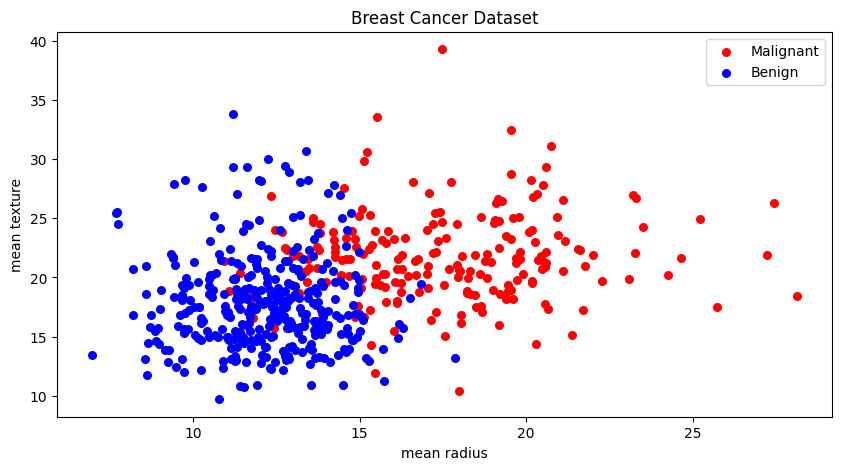

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (0 for malignant, 1 for benign)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select two features for visualization (e.g., mean radius and mean texture)
feature1 = 0  # Index of the first feature
feature2 = 1  # Index of the second feature

# Create a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(X[y == 0, feature1], X[y == 0, feature2], c='red', label='Malignant', s=30)
plt.scatter(X[y == 1, feature1], X[y == 1, feature2], c='blue', label='Benign', s=30)
plt.xlabel(data.feature_names[feature1])
plt.ylabel(data.feature_names[feature2])
plt.legend(loc='best')
plt.title("Breast Cancer Dataset")
plt.show()

## Step 2: Implement the sigmoid function, which maps any input into a value between 0 and 1.

In [ ]:
# Step 2: Implement the sigmoid function, which maps any input into a value between 0 and 1.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## Step 3: Define the gradient of the in-sample error function for logistic regression.


In [ ]:
# Step 3: Define the gradient of the in-sample error function for logistic regression.
def gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    gradient = (1/m) * X.T.dot(h - y)
    return gradient

## Step 4: Implement the gradient descent algorithm


In [ ]:
# Step 4: Implement the gradient descent algorithm
def gradient_descent(X, y, initial_theta, learning_rate, num_iterations):
    theta = initial_theta
    for _ in range(num_iterations):
        gradient_vector = gradient(X, y, theta)
        theta -= learning_rate * gradient_vector
    return theta

## Step 5: Fit the model on the dataset and predict class probabilities.

In [ ]:
# Step 5: Fit the model on the dataset and predict class probabilities.
# Add a column of ones for the intercept term
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
# Initialize theta (model parameters)
initial_theta = np.zeros(X_train_b.shape[1])

# Set hyperparameters
learning_rate = 0.1
num_iterations = 1000

# Call gradient_descent to find optimal theta
optimal_theta = gradient_descent(X_train_b, y_train, initial_theta, learning_rate, num_iterations)

# Add a column of ones for the intercept term to the test set
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Calculate class probabilities using the learned theta
y_probs = sigmoid(X_test_b.dot(optimal_theta))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14196\3083160676.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


## Step 6: Set a decision boundary to classify data points

In [ ]:
# Step 6: Set a decision boundary to classify data points
def classify(probabilities, threshold=0.5):
    return (probabilities >= threshold).astype(int)

## Step 7: Compare the performance with scikit-learn Logistic Regression


In [ ]:
# Step 7: Compare the performance with scikit-learn Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_sklearn = lr.predict(X_test)
y_pred_custom = classify(y_probs)

# Compare accuracy between the custom and scikit-learn models
accuracy_custom = accuracy_score(y_test, y_pred_custom)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print("Accuracy of Custom Logistic Regression: {:.2f}%".format(accuracy_custom * 100))
print("Accuracy of Scikit-learn Logistic Regression: {:.2f}%".format(accuracy_sklearn * 100))

Accuracy of Custom Logistic Regression: 94.74%
Accuracy of Scikit-learn Logistic Regression: 95.61%
